In [4]:
import os
import numpy as np

os.chdir('..')

In [5]:
!pwd

/Users/admin/Documents/Research/SSL/matrixssl-inductive


In [1]:
import torch
import matplotlib.pyplot as plt

In [63]:
def plot_results(start_idx, end_idx, to_plot, prefix, title, plot_all=False):
    dicts = []
    for i in range(start_idx, end_idx+1):
        dictionary = torch.load(f'./outputs/{prefix}_run{i}')
        dicts.append(dictionary)

    if to_plot == 'val':
        values = [dictionary['val_accs'] for dictionary in dicts]
    elif to_plot == 'train':
        values = [dictionary['train_losses'] for dictionary in dicts]

    values_np = np.asarray(values)
    avgs = values_np.mean(axis=0)
    stds = values_np.std(axis=0)

    x = [i for i in range(len(avgs))]
    plt.figure()
    plt.plot(x, avgs, 'k')
    plt.fill_between(x, avgs-stds, avgs+stds,
        alpha=0.2, facecolor='#089FFF',
        linewidth=4, antialiased=True)
    if to_plot == 'val':
        plt.ylim(0.5, 1)
        plt.ylabel('Classification Accuracy')
        plt.xlabel('Epochs')
    elif to_plot == 'train':
        plt.ylabel('Train Loss')
        plt.xlabel('Train Steps')
    
    plt.title(title)
    
    if plot_all:
        plt.plot(values_np.T)
    plt.show()


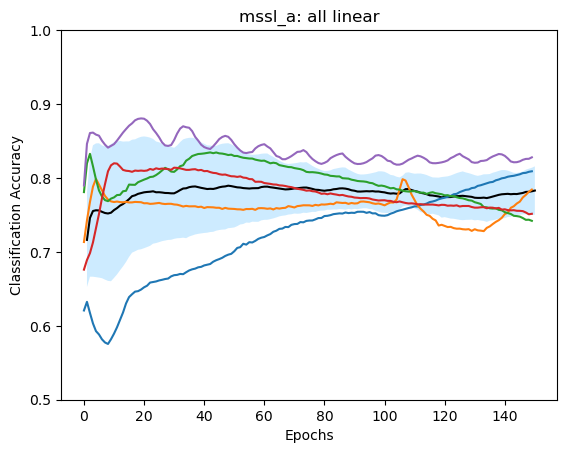

In [25]:
plot_results(start_idx=1, end_idx=5, title='mssl_a: all linear', plot_all=False)

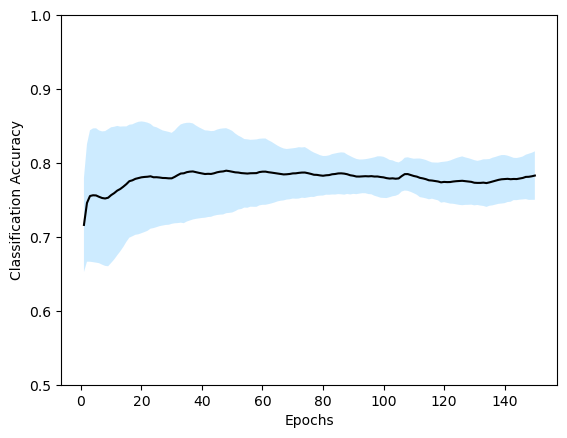

In [26]:
x = [i for i in range(1, len(val_avgs)+1)]
plt.plot(x, val_avgs, 'k')
plt.fill_between(x, val_avgs-val_stds, val_avgs+val_stds,
    alpha=0.2, facecolor='#089FFF',
    linewidth=4, antialiased=True)
plt.ylim(0.5, 1)
plt.ylabel('Classification Accuracy')
plt.xlabel('Epochs')
plt.show()


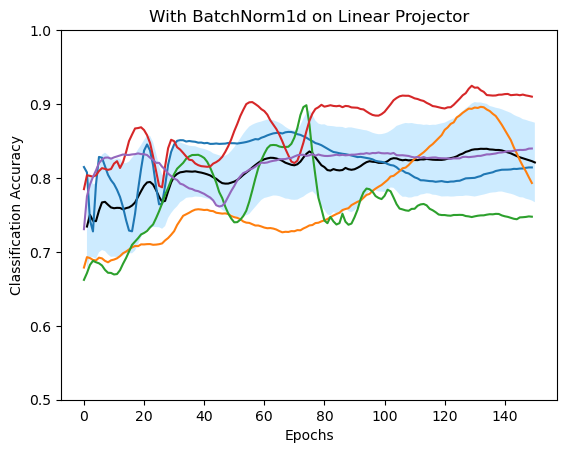

In [23]:
# BATCHNORM1D ON PROJECTOR, EVERYTHING LINEAR
plot_results(start_idx=6, end_idx=10, title='mssl_a: BatchNorm1d on projector, all linear', plot_all=False)

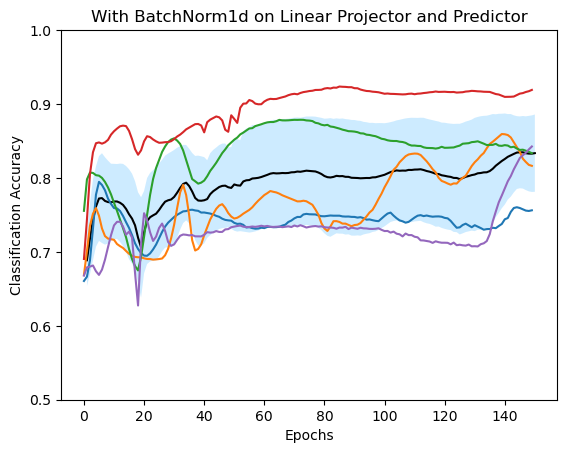

In [24]:
# BATCHNORM1D ON PROJECTOR AND PREDICTOR, EVERYTHING LINEAR
plot_results(start_idx=11, end_idx=15, title='mssl_a: BatchNorm1d on projector+predictor, all linear', plot_all=False)

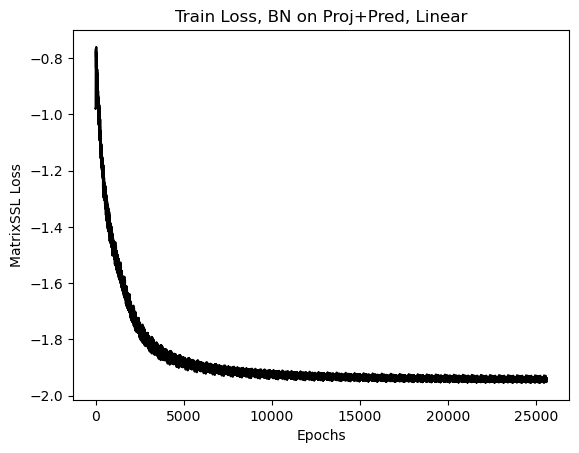

In [39]:
# plot train loss for single run of above experiment:
# bs = 128, lr = 

dictionary = torch.load(f'./outputs/mssl_a_linear_sgd_run16')

train_losses = dictionary['train_losses']
train_losses_np = np.asarray(train_losses)

val_accs = dictionary['val_accs']
val_accs_np = np.asarray(val_accs)

x = [i for i in range(1, len(train_losses)+1)]
plt.figure()    
plt.plot(x, train_losses_np, 'k')

plt.ylabel('MatrixSSL Loss')
plt.xlabel('Epochs')
plt.title("Train Loss, BN on Proj+Pred, Linear")
plt.show()

In [29]:
dictionary['batch_size']

128

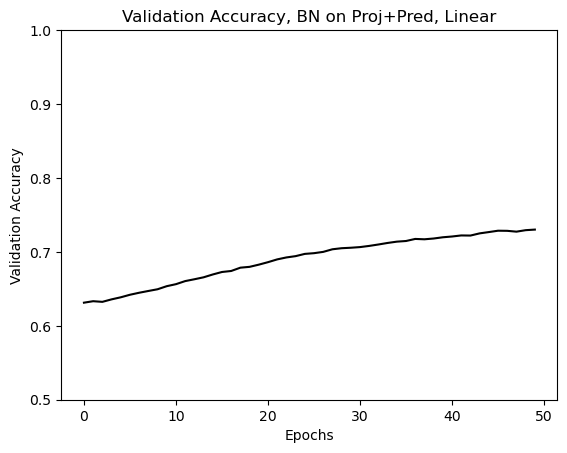

In [41]:
plt.figure()
plt.plot(val_accs, 'k')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylim(0.5, 1)
plt.title("Validation Accuracy, BN on Proj+Pred, Linear")
plt.show()

In [35]:
test_dict = torch.load(f'./outputs/mssl_a_linear_sgd_run16')
test_dict['batch_size']

128

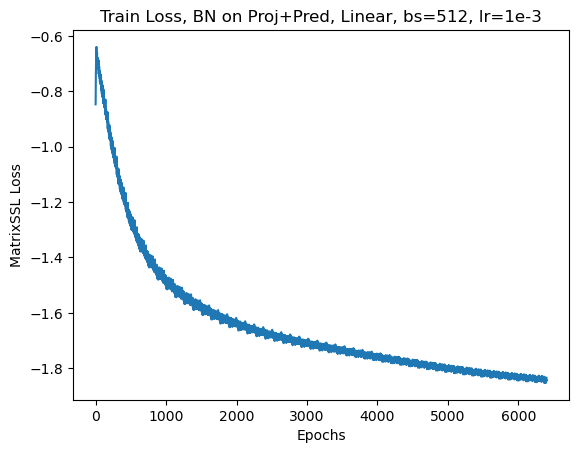

In [36]:
dictionary = torch.load(f'./outputs/mssl_a_linear_sgd_run17')

train_losses = dictionary['train_losses']
train_losses_np = np.asarray(train_losses)

val_accs = dictionary['val_accs']
val_accs_np = np.asarray(val_accs)


plt.figure()    
plt.plot(train_losses_np)

plt.ylabel('MatrixSSL Loss')
plt.xlabel('Epochs')
plt.title("Train Loss, BN on Proj+Pred, Linear, bs=512, lr=1e-3")
plt.show()

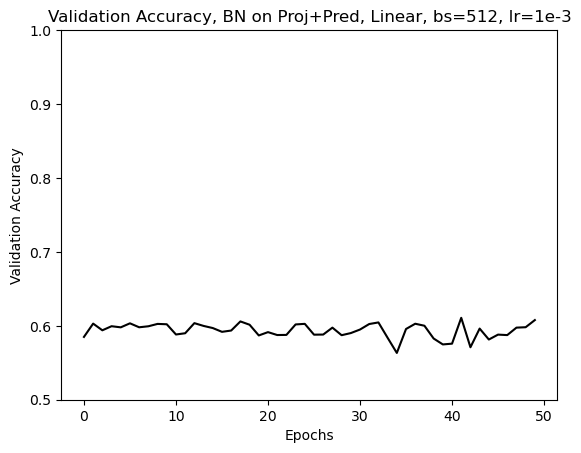

In [38]:
plt.figure()
plt.plot(val_accs, 'k')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylim(0.5, 1)
plt.title("Validation Accuracy, BN on Proj+Pred, Linear, bs=512, lr=1e-3")
plt.show()

Above cells were all using SGD (using Adam/Adam+WD seems to be the primary difference maker)

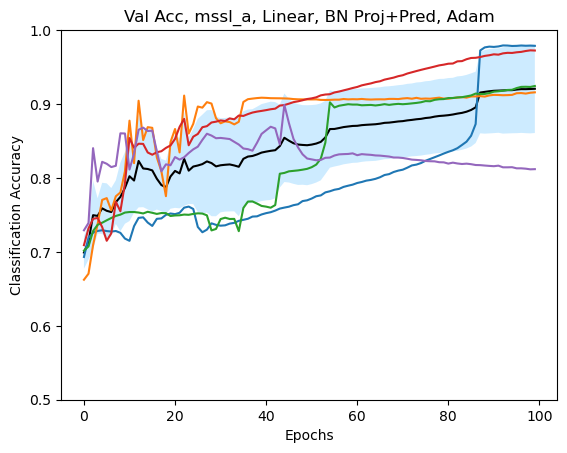

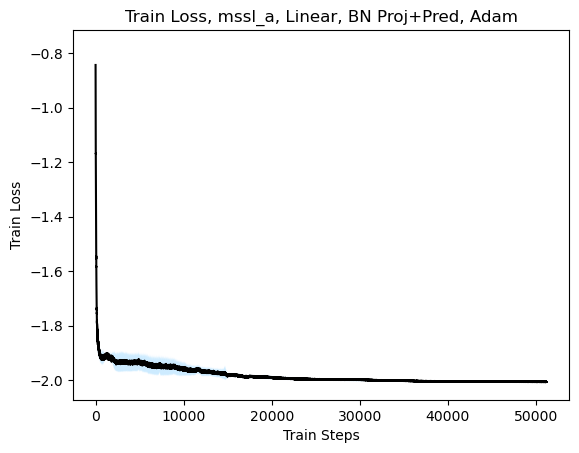

In [66]:
# Use Adam instead
plot_results(start_idx=1, end_idx=5, to_plot='val', prefix='mssl_a_linear_adam', title='Val Acc, mssl_a, Linear, BN Proj+Pred, Adam', plot_all=True)
plot_results(start_idx=1, end_idx=5, to_plot='train', prefix='mssl_a_linear_adam', title='Train Loss, mssl_a, Linear, BN Proj+Pred, Adam', plot_all=False)


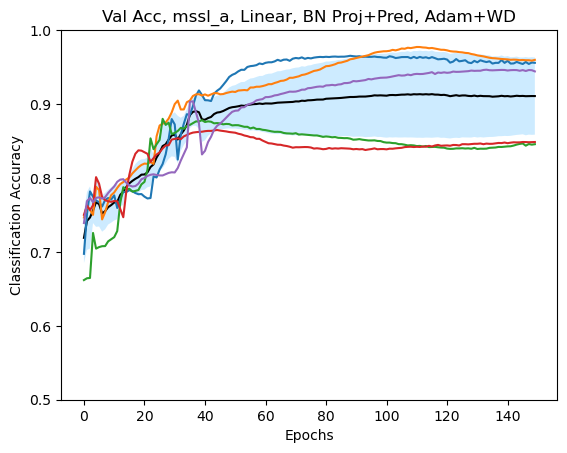

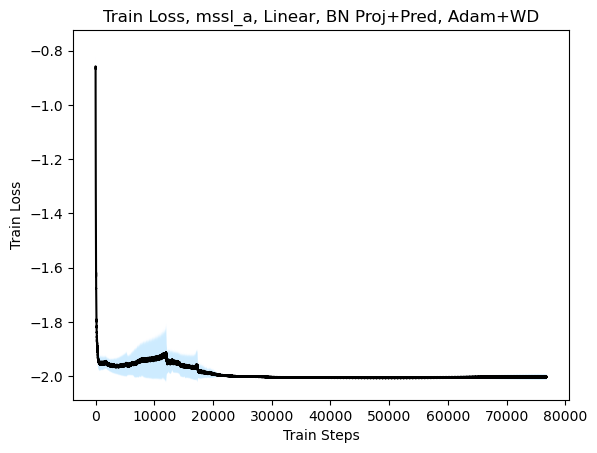

In [67]:
plot_results(start_idx=1, end_idx=5, to_plot='val', prefix='mssl_a_linear_adam_wd', title='Val Acc, mssl_a, Linear, BN Proj+Pred, Adam+WD', plot_all=True)
plot_results(start_idx=1, end_idx=5, to_plot='train', prefix='mssl_a_linear_adam_wd', title='Train Loss, mssl_a, Linear, BN Proj+Pred, Adam+WD', plot_all=False)
